# **LGM-VIP Data Science Internship Programme**
# **Adavanced Level Task-3**
# **Handwritten equation solver using CNN**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!apt-get install unrar

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unrar is already the newest version (1:5.5.8-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [3]:
!unzip /content/drive/MyDrive/lgm/data.zip

Streaming output truncated to the last 5000 lines.
  inflating: extracted_images/0/0_24106.jpg  
  inflating: extracted_images/0/0_2414.jpg  
  inflating: extracted_images/0/0_24177.jpg  
  inflating: extracted_images/0/0_2420.jpg  
  inflating: extracted_images/0/0_24398.jpg  
  inflating: extracted_images/0/0_24469.jpg  
  inflating: extracted_images/0/0_2462.jpg  
  inflating: extracted_images/0/0_24690.jpg  
  inflating: extracted_images/0/0_24761.jpg  
  inflating: extracted_images/0/0_2490.jpg  
  inflating: extracted_images/0/0_24982.jpg  
  inflating: extracted_images/0/0_2501.jpg  
  inflating: extracted_images/0/0_25053.jpg  
  inflating: extracted_images/0/0_25274.jpg  
  inflating: extracted_images/0/0_25345.jpg  
  inflating: extracted_images/0/0_2552.jpg  
  inflating: extracted_images/0/0_25566.jpg  
  inflating: extracted_images/0/0_25637.jpg  
  inflating: extracted_images/0/0_25858.jpg  
  inflating: extracted_images/0/0_25929.jpg  
  inflating: extracted_images/0/0_2

In [4]:
!unrar x /content/data.rar

Streaming output truncated to the last 5000 lines.
Extracting  extracted_images/z/exp75725.jpg                               98%  OK 
Extracting  extracted_images/z/exp75743.jpg                               98%  OK 
Extracting  extracted_images/z/exp75756.jpg                               98%  OK 
Extracting  extracted_images/z/exp75762.jpg                               98%  OK 
Extracting  extracted_images/z/exp75782.jpg                               98%  OK 
Extracting  extracted_images/z/exp75787.jpg                               98%  OK 
Extracting  extracted_images/z/exp75789.jpg                               98%  OK 
Extracting  extracted_images/z/exp75831.jpg                               98%  OK 
Extracting  extracted_images/z/exp75832.jpg                               98%  OK 
Extracting  extracted_images/z/exp75834.jpg                               98%  OK 
Extracting  extracted_images/

In [5]:
import numpy as np 
import pandas as pd 
import os
print(os.listdir("/content"))

['.config', 'data.rar', 'extracted_images', 'drive', 'sample_data']


In [6]:
print(os.listdir("/content/extracted_images"))

['gamma', '-', 'sum', 'div', 'pi', '=', '3', 'in', '}', 'o', 'cos', 'geq', '4', '+', 'T', 'pm', '1', ',', '6', 'lim', 'sin', 'v', 'A', 'sqrt', 'R', 'j', 'ascii_124', 'k', 'phi', '2', '9', 'N', '0', 'l', 'S', ']', 'd', 'p', 'times', 'X', 'prime', '8', 'beta', '7', 'ldots', 'w', 'sigma', 'int', 'mu', '{', '[', 'e', 'theta', 'y', 'z', 'leq', 'H', 'i', 'neq', 'M', 'infty', 'gt', 'C', 'lt', 'f', 'alpha', ')', 'b', 'Delta', 'exists', '(', 'forward_slash', 'rightarrow', 'forall', 'u', 'log', '5', 'lambda', '!', 'G', 'q', 'tan']


Note - Here I have uploded the Zip Version of DataSet as private Dataset

In [7]:
!pip install split-folders    # Library to split Train and valid Image sets in ImageNet style

In [8]:
import os
import numpy as np
from tqdm import tqdm
from fastai import *
import torch
from fastai.vision import *
%matplotlib inline
from fastai.callbacks import *
import cv2
import pandas as pd
import splitfolders

In [9]:
image_load_size = 64
bs = 24

In [10]:
 def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True    

SEED = 999
seed_everything(SEED)

In [11]:
splitfolders.ratio('/content/extracted_images', output="/content/output", seed=SEED, ratio=(.8, .2)) # default va

Copying files: 375974 files [00:48, 7828.44 files/s]


In [12]:
tfms = get_transforms(do_flip=True, flip_vert=False, max_lighting=0.1, max_zoom=1.05,
                      max_warp=0.,
                      xtra_tfms=[rand_crop(), rand_zoom(1, 1.5),
                                 symmetric_warp(magnitude=(-0.2, 0.2))])

In [13]:
data = (ImageList.from_folder(path='/content/output')
        .split_by_folder(train='train',valid='val')
        .label_from_folder()
        .transform(tfms,size = image_load_size,resize_method=ResizeMethod.SQUISH)
        .databunch(path='.',bs=bs)    
        .normalize(imagenet_stats)
)

/usr/local/lib/python3.7/dist-packages/fastai/vision/transform.py:247: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  return _solve_func(B,A)[0][:,0]


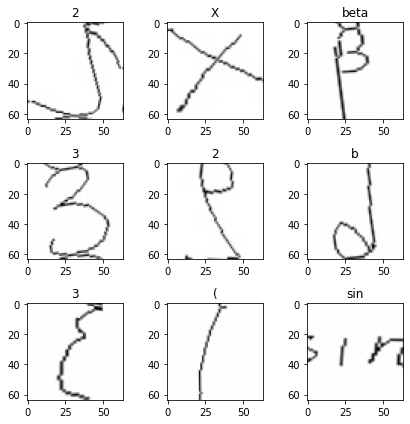

In [14]:
 data.show_batch(3, figsize=(6,6), hide_axis=False)

In [15]:
len(data.classes)

82

In [16]:
 data.classes

['!',
 '(',
 ')',
 '+',
 ',',
 '-',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '=',
 'A',
 'C',
 'Delta',
 'G',
 'H',
 'M',
 'N',
 'R',
 'S',
 'T',
 'X',
 '[',
 ']',
 'alpha',
 'ascii_124',
 'b',
 'beta',
 'cos',
 'd',
 'div',
 'e',
 'exists',
 'f',
 'forall',
 'forward_slash',
 'gamma',
 'geq',
 'gt',
 'i',
 'in',
 'infty',
 'int',
 'j',
 'k',
 'l',
 'lambda',
 'ldots',
 'leq',
 'lim',
 'log',
 'lt',
 'mu',
 'neq',
 'o',
 'p',
 'phi',
 'pi',
 'pm',
 'prime',
 'q',
 'rightarrow',
 'sigma',
 'sin',
 'sqrt',
 'sum',
 'tan',
 'theta',
 'times',
 'u',
 'v',
 'w',
 'y',
 'z',
 '{',
 '}']

In [17]:
class FocalLoss(nn.Module):
    def __init__(self, alpha=1., gamma=2.):
        super().__init__()
        self.alpha = alpha
        self.gamma = gamma

    def forward(self, inputs, targets, **kwargs):
        CE_loss = nn.CrossEntropyLoss(reduction='none')(inputs, targets)
        pt = torch.exp(-CE_loss)
        F_loss = self.alpha * ((1-pt)**self.gamma) * CE_loss
        return F_loss.mean()

In [18]:
model = cnn_learner(data,models.densenet161, metrics = [accuracy,error_rate],callback_fns=[partial(SaveModelCallback, monitor='accuracy', name='best_model')])
model.loss_func = FocalLoss()
model.summary()

Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /root/.cache/torch/hub/checkpoints/densenet161-8d451a50.pth


  0%|          | 0.00/110M [00:00<?, ?B/s]

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [96, 32, 32]         14,112     False     
______________________________________________________________________
BatchNorm2d          [96, 32, 32]         192        True      
______________________________________________________________________
ReLU                 [96, 32, 32]         0          False     
______________________________________________________________________
MaxPool2d            [96, 16, 16]         0          False     
______________________________________________________________________
BatchNorm2d          [96, 16, 16]         192        True      
______________________________________________________________________
ReLU                 [96, 16, 16]         0          False     
______________________________________________________________________
Conv2d               [192, 16, 16]        18,432     False     
___________________________________________________

epoch,train_loss,valid_loss,accuracy,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.74E-03
Min loss divided by 10: 8.32E-03


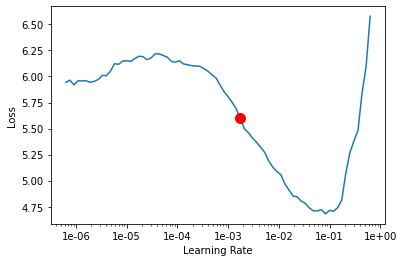

In [19]:
model.lr_find()
model.recorder.plot(suggestion = True)

In [20]:
lr = 2e-3
model.fit_one_cycle(1,slice(lr))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.195291,0.128609,0.916946,0.083054,30:29


Better model found at epoch 0 with accuracy value: 0.9169458150863647.


epoch,train_loss,valid_loss,accuracy,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 6.92E-07


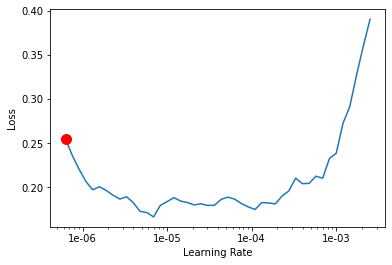

In [21]:
model.unfreeze()
model.lr_find()
model.recorder.plot(suggestion = True)

In [22]:
 model.fit_one_cycle(1,slice(1e-6,lr/10))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.154116,0.098829,0.929960,0.070040,37:40


Better model found at epoch 0 with accuracy value: 0.9299595952033997.


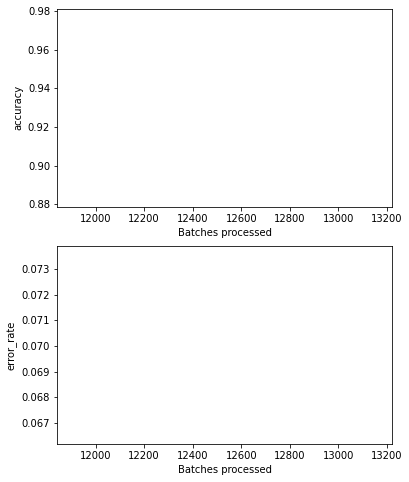

In [23]:
model.recorder.plot_metrics()

In [24]:
model.load('best_model')

Learner(data=ImageDataBunch;

Train: LabelList (300746 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
gamma,gamma,gamma,gamma,gamma
Path: /content/output;

Valid: LabelList (75228 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
gamma,gamma,gamma,gamma,gamma
Path: /content/output;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Sequential(
      (conv0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (norm0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu0): ReLU(inplace=True)
      (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (denseblock1): _DenseBlock(
        (denselayer1): _DenseLayer(
          (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (

In [25]:
valid_loss_save_model,accuracy_save_model, error_rate_save_model = model.validate(model.data.valid_dl)
print('valid_loss:', valid_loss_save_model, 'accuracy:', float(accuracy_save_model),'error_rate:',float(error_rate_save_model))

valid_loss: 0.09882863 accuracy: 0.9299595952033997 error_rate: 0.07004041224718094


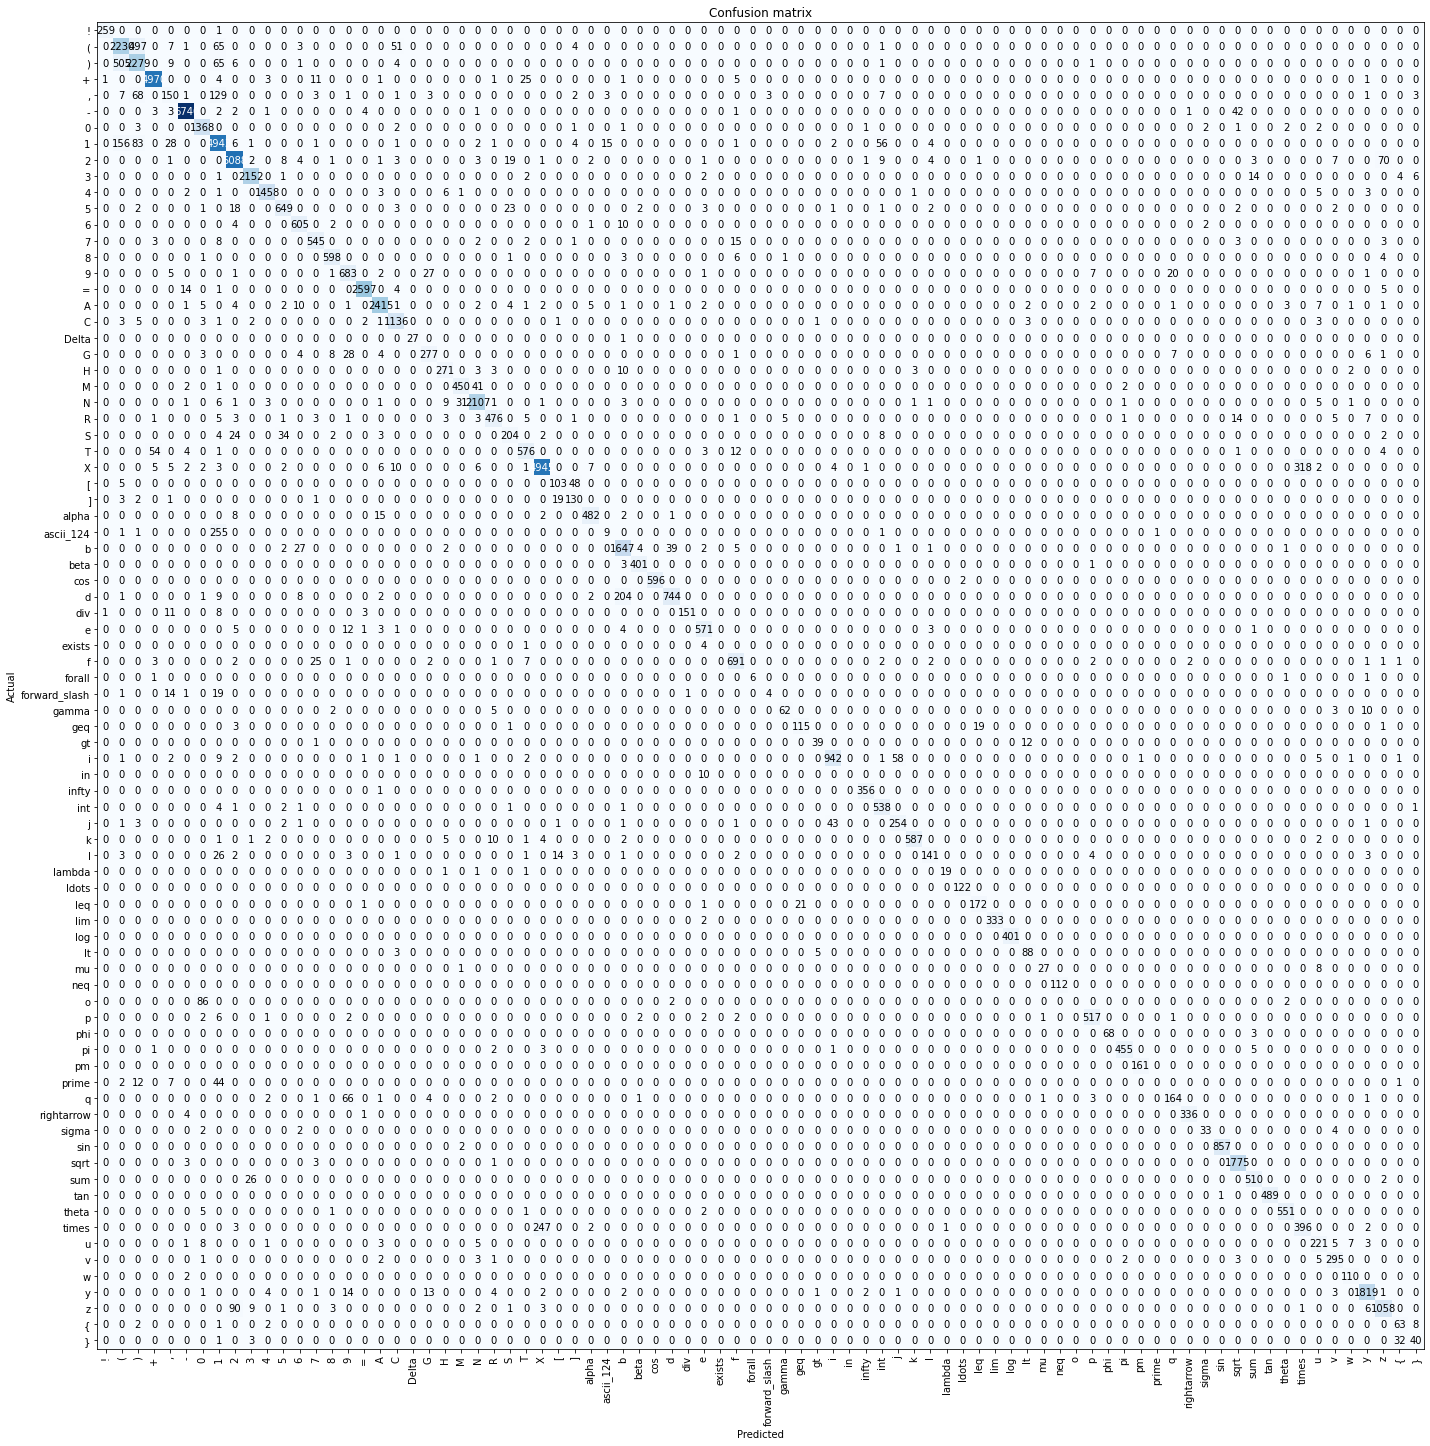

In [26]:
interpreter = ClassificationInterpretation.from_learner(model)
interpreter.plot_confusion_matrix(figsize = (20,20))

In [27]:
interpreter.most_confused(min_val=50)

[(')', '(', 505),
 ('(', ')', 497),
 ('X', 'times', 318),
 ('ascii_124', '1', 255),
 ('times', 'X', 247),
 ('d', 'b', 204),
 ('1', '(', 156),
 (',', '1', 129),
 ('z', '2', 90),
 ('o', '0', 86),
 ('1', ')', 83),
 ('2', 'z', 70),
 (',', ')', 68),
 ('q', '9', 66),
 ('(', '1', 65),
 (')', '1', 65),
 ('i', 'j', 58),
 ('1', 'int', 56),
 ('T', '+', 54),
 ('(', 'C', 51)]

In [28]:
print(os.listdir('/content/output/val/!'))

['exp20531.jpg', 'exp14673.jpg', 'exp14073.jpg', 'exp8473.jpg', '!_98925.jpg', 'exp17968.jpg', '!_102117.jpg', 'exp22329.jpg', 'exp15746.jpg', 'exp94660.jpg', 'exp95218.jpg', '!_27835.jpg', 'exp11714.jpg', 'exp28667.jpg', 'exp8194.jpg', '!_102111.jpg', '!_19943.jpg', 'exp24757.jpg', 'exp12590.jpg', 'exp14327.jpg', 'exp18354.jpg', 'exp14050.jpg', 'exp14150.jpg', 'exp13356.jpg', 'exp7935.jpg', '!_12011.jpg', 'exp11047.jpg', 'exp23364.jpg', '!_12585.jpg', '!_9952.jpg', 'exp19076.jpg', 'exp85006.jpg', '!_22341.jpg', 'exp10555.jpg', 'exp11401.jpg', '!_112938.jpg', '!_20287.jpg', 'exp23622.jpg', '!_23207.jpg', 'exp92226.jpg', 'exp28638.jpg', '!_23222.jpg', 'exp87524.jpg', '!_23212.jpg', 'exp12492.jpg', 'exp10025.jpg', 'exp93080.jpg', 'exp12064.jpg', 'exp80374.jpg', 'exp88405.jpg', 'exp25830.jpg', 'exp19478.jpg', 'exp93021.jpg', '!_25845.jpg', 'exp14668.jpg', '!_99781.jpg', 'exp87530.jpg', '!_24385.jpg', 'exp7945.jpg', 'exp12215.jpg', 'exp11417.jpg', '!_32021.jpg', 'exp19675.jpg', 'exp14926.j

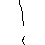

In [29]:
open_image('/content/output/val/!/!_10838.jpg')

In [30]:
pred = model.predict(open_image('/content/output/val/!/!_10838.jpg'))
print(pred[0])

!
